In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from sir import Sir_model

## Instantiate a model with parameters

In [2]:
graph_nx = nx.erdos_renyi_graph(n=10, p=0.1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)

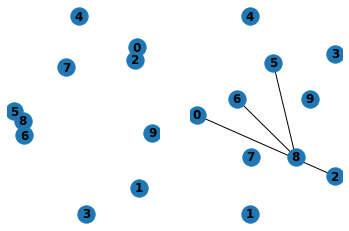

In [3]:
plt.subplot(121)

nx.draw(graph_nx, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(graph_nx, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [4]:
model = Sir_model(beta = 4, gamma = 0.04, adj_matrix = graph)

## Integrate the model starting from initial conditions

In [5]:
S0 = np.append(np.ones(len(graph)-5), np.zeros(5)) # Susceptive value initial
I0 = np.append(np.zeros(len(graph)-5), np.ones(5))  # Infected value initial
R0 = np.zeros(len(graph)) # Recovered value initial

y0 = np.append(S0,[I0,R0])

In [6]:
y, t = model.run(y0 = np.append(S0,[I0,R0]), dt=0.01, T=500)

## Plot the numbers of susceptive, infected and recovered people with time

Text(0.5, 0, 'time')

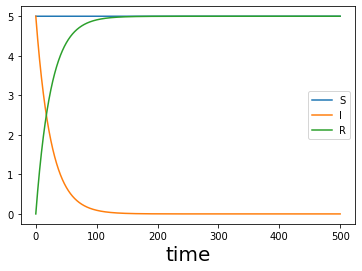

In [7]:
plt.plot(t, np.sum(y[:,0:len(graph)], axis=1), label="S")
plt.plot(t, np.sum(y[:,len(graph): 2 * len(graph)], axis=1), label="I")
plt.plot(t,np.sum(y[:,2 * len(graph): 3 * len(graph)], axis=1), label="R")
plt.legend()
plt.xlabel('time', fontsize=20)